1.   Complete the code below showing the sequential posterior distributions created as each observation is actualized.

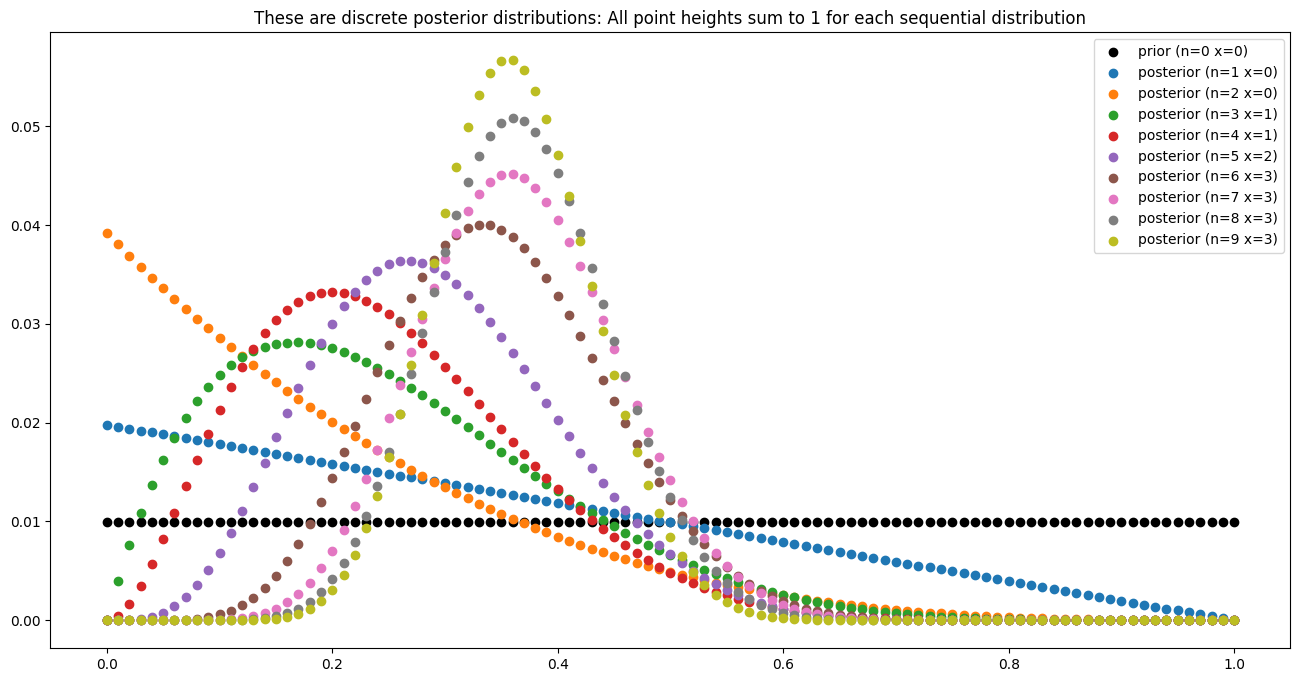

In [14]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

np.random.seed(365)
parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

posterior = prior
for observation in observations:
    n += 1
    x += observation

    likelihood = stats.binom.pmf(x, n, parameter_domain)
    posterior *= likelihood
    posterior /= np.sum(posterior) # Normalization
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();
plt.show();


2. Provide some visualizations demonstrating the learning process that the Bayesian multi-armed bandit algorithm undergoes.

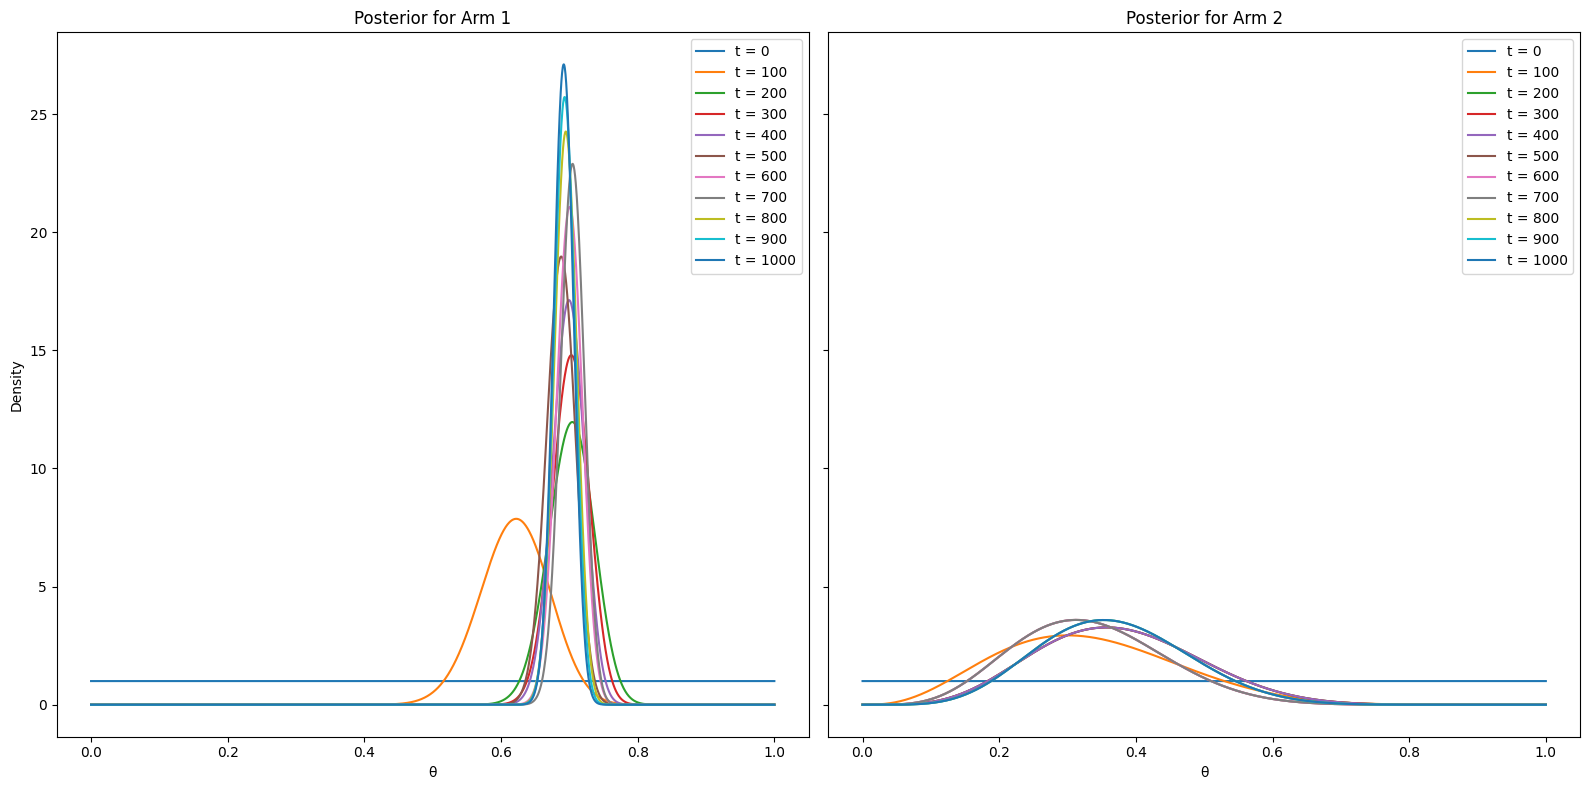

In [13]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import beta

np.random.seed(365)
theta_true_1, theta_true_2 = 0.7, 0.4
n_1, n_2, x_1, x_2 = 0, 0, 0, 0
alpha_1, beta_1, alpha_2, beta_2 = 1, 1, 1, 1 # Beta priors
lst_alpha_1, lst_beta_1, lst_alpha_2, lst_beta_2 = [alpha_1], [beta_1], [alpha_2], [beta_2]

m = 1000
for t in range(m):
    sample_1 = np.random.beta(alpha_1, beta_1)
    sample_2 = np.random.beta(alpha_2, beta_2)

    if sample_1 > sample_2:
        n_1 += 1
        if np.random.rand() < theta_true_1:
            x_1 += 1
        alpha_1 = 1 + x_1
        beta_1 = 1 + (n_1 - x_1)
    else:
        n_2 += 1
        if np.random.rand() < theta_true_2:
            x_2 += 1
        alpha_2 = 1 + x_2
        beta_2 = 1 + (n_2 - x_2)

    lst_alpha_1.append(alpha_1)
    lst_beta_1.append(beta_1)
    lst_alpha_2.append(alpha_2)
    lst_beta_2.append(beta_2)

# Visualization of posterior updates
x = np.linspace(0, 1, 2000)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

for i, (a, b) in enumerate(zip(lst_alpha_1[::100], lst_beta_1[::100])):
    axes[0].plot(x, beta.pdf(x, a, b), label="t = "+str(i*100))
axes[0].set_title("Posterior for Arm 1")
axes[0].set_xlabel("θ")
axes[0].set_ylabel("Density")
axes[0].legend()

for i, (a, b) in enumerate(zip(lst_alpha_2[::100], lst_beta_2[::100])):
    axes[1].plot(x, beta.pdf(x, a, b), label="t = "+str(i*100))
axes[1].set_title("Posterior for Arm 2")
axes[1].set_xlabel("θ")
axes[1].legend()

plt.tight_layout()
plt.show()


3. Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:

    *    Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
    *    Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

 Discuss which of the two approaches you think is most appropriate and describe an actual real world AB testing context where you could deploy this Bayesian multi-armed bandit to effectively balancing the exploration-exploitation tradeoff in that setting.

*   Let us consider a study where we are UofT trying to investigate whether enrolled students in various courses read emails sent from the school.

 For the first case, assume that there are three types of emails that we are testing on: *Administration Announcements*, *School News*, and *Advertisements*.

 These emails will often have overlapping demographics and possible dependence on on another (i.e. read school news that a famous professor joined UofT's teaching team -> likely to read administration announcements for the hope to enrolling in their new course). This warrants a Dirichlet-Multinomial model which helps in this case by pooling information. For example, if all three emails are related to a free coffee campaign in front of Sidney Smith. If one email performs exceptionally well, we can best predict the performance of other emails using the model at hand.

 For the second case, assume that there are three types of emails that we are testing on: *Undergraduate Course Administration*, *TA Support Tools*, and *Professors' Seminars*.

 These emails have clear intended demographics, and the performance of one type of email will most likely have no effect on other types (i.e. professors likely won't bother themselves to read TA Support Tools or Undergraduate Course Administration) This warrants a beta-binomial model which helps in this case by, assuming independence, capturing overdispersion. For example, emails that target professors (who are often less tech savvy) could have less read-rates than ones that target students (who are often more tech savvy). Using a beta-binomial model allows us to avoid unfairly comparing the types independently.

 In conclusions, the Bayesian multi-armed bandit balances exploration (testing lesser-sampled emails) and exploitation (prioritizing emails with higher read rates) by dynamically allocating email resources.